<a href="https://colab.research.google.com/github/KenaMuigai/CustomerSegmentation-CustomerLifetimeValue/blob/main/CustomerSegmentation_%2B_CustomerLifetimeValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
file_path = 'drive/MyDrive/analysisProject/Online_Retail.csv'
data = pd.read_csv(file_path, encoding = 'unicode_escape')

In [ ]:
data.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
country_data = data[['Country','CustomerID']].drop_duplicates()
country_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending = False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [ ]:
data = data.query("Country == 'United Kingdom'").reset_index(drop = True)

In [ ]:
data.isnull().sum(axis=0)

ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      133600
Country              0
dtype: int64

In [ ]:
data.rename(columns = {'ï»¿InvoiceNo':'InvoiceNo'}, inplace = True)

In [ ]:
data[pd.notnull(data['CustomerID'])]
data.Quantity.min()

-80995

In [ ]:
data.UnitPrice.min()

-11062.06

In [ ]:
data= data[(data['Quantity']>0)]

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.shape

(486286, 9)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#RFM MODELLING

In [ ]:
import datetime as dt

latest_date = dt.datetime(2011,12,10)

RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

RFMScores.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo':'Frequency',
                            'TotalAmount': 'Monetary'}, inplace = True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


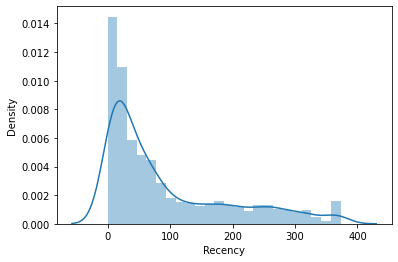

In [ ]:
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [ ]:
RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


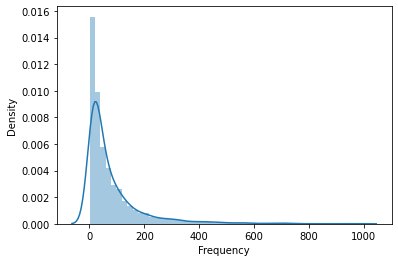

In [ ]:
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [ ]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [ ]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(RScoring, args = ('Frequency', quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(RScoring, args = ('Monetary', quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,1,4
12747.0,2,103,4196.01,1,4,4
12748.0,0,4596,33719.73,1,4,4
12749.0,3,199,4090.88,1,4,4
12820.0,3,59,942.34,1,3,3


In [ ]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

RFMScores['RFMScore'] = RFMScores[['R', 'F','M']].sum(axis=1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9
12747.0,2,103,4196.01,1,4,4,144,9
12748.0,0,4596,33719.73,1,4,4,144,9
12749.0,3,199,4090.88,1,4,4,144,9
12820.0,3,59,942.34,1,3,3,133,7


In [ ]:
Loyalty_level = ['Platinum', 'Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,1,4,414,9,Silver
1,12747.0,2,103,4196.01,1,4,4,144,9,Silver
2,12748.0,0,4596,33719.73,1,4,4,144,9,Silver
3,12749.0,3,199,4090.88,1,4,4,144,9,Silver
4,12820.0,3,59,942.34,1,3,3,133,7,Gold


In [ ]:
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,14480.0,11,13,279.05,1,1,1,111,3,Platinum
1,16313.0,3,16,274.15,1,1,1,111,3,Platinum
2,14520.0,1,4,270.60,1,1,1,111,3,Platinum
3,12962.0,7,16,266.39,1,1,1,111,3,Platinum
4,13277.0,15,8,258.40,1,1,1,111,3,Platinum
5,13404.0,1,11,252.49,1,1,1,111,3,Platinum
6,13207.0,15,8,250.26,1,1,1,111,3,Platinum
7,16596.0,15,12,250.15,1,1,1,111,3,Platinum
8,13349.0,10,16,247.32,1,1,1,111,3,Platinum
9,15783.0,10,14,246.30,1,1,1,111,3,Platinum


# DATA NORMALIZATION & STANDARDIZATION


In [ ]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=1ec76670e0328647f8aaf02d0cdae71672148f6d931dedbbed2215e057616ad8
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
        gobj.Scatter(
            x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
            y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
            mode = 'markers',
            name = 'Bronze',
            marker = dict(size = 7,
                line = dict(width=1),
                color = 'blue',
                opacity = 0.8
                )
        ),
            gobj.Scatter(
            x=graph.query("RFM_Loyalty_Level == 'Sliver'")['Recency'],
            y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
            mode = 'markers',
            name = 'Silver',
            marker = dict(size = 9,
                line = dict(width=1),
                color = 'green',
                opacity = 0.5
                )
        ),
            gobj.Scatter(
            x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
            y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
            mode = 'markers',
            name = 'Gold',
            marker = dict(size = 11,
                line = dict(width=1),
                color = 'red',
                opacity = 0.9
                )
        ),
        gobj.Scatter(
            x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
            y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
            mode = 'markers',
            name = 'Platinum',
            marker = dict(size = 13,
                line = dict(width=1),
                color = 'black',
                opacity = 0.9
                )
        ), 
]

plot_layout = gobj.Layout(
    yaxis = {'title': "Frequency"},
    xaxis = {'title': "Recency"},
    title = 'Segments'
)

fig = gobj.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

#K-MEANS CLUSTERING

In [ ]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



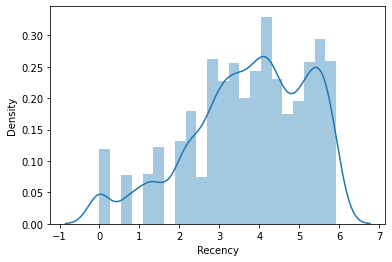

In [ ]:
Recency_plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



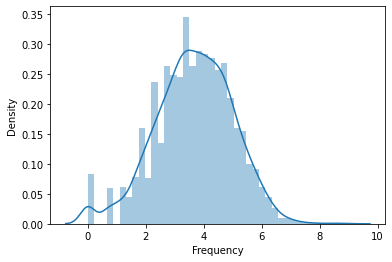

In [ ]:
Frequency_plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



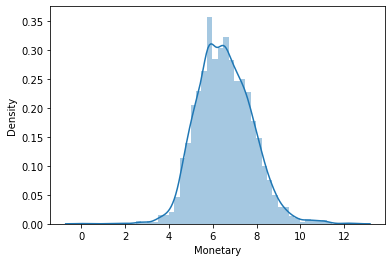

In [ ]:
Monetary_plot = Log_Tfd_Data.query('Monetary < 1000')['Monetary']
ax = sns.distplot(Monetary_plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

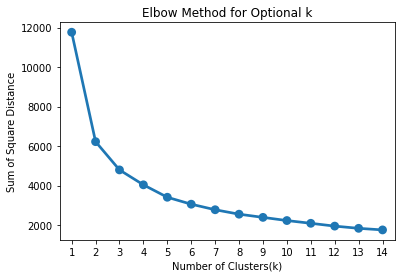

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_

sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distance')
plt.title('Elbow Method for Optional k')
plt.show()

In [ ]:
KMean_clust = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 1000)
KMean_clust.fit(Scaled_Data)

RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,Silver,2
12747.0,2,103,4196.01,1,4,4,144,9,Silver,0
12748.0,1,4596,33719.73,1,4,4,144,9,Silver,0
12749.0,3,199,4090.88,1,4,4,144,9,Silver,0
12820.0,3,59,942.34,1,3,3,133,7,Gold,0


<Figure size 504x504 with 0 Axes>

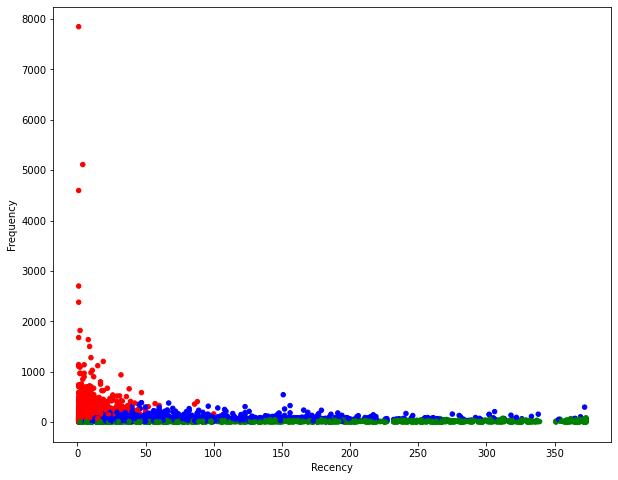

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(
    kind = "scatter",
    x="Recency", y="Frequency",
    figsize=(10,8),
    c= RFMScores['Color']
)

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,Silver,2,blue
12747.0,2,103,4196.01,1,4,4,144,9,Silver,0,red
12748.0,1,4596,33719.73,1,4,4,144,9,Silver,0,red
12749.0,3,199,4090.88,1,4,4,144,9,Silver,0,red
12820.0,3,59,942.34,1,3,3,133,7,Gold,0,red


<Figure size 504x504 with 0 Axes>

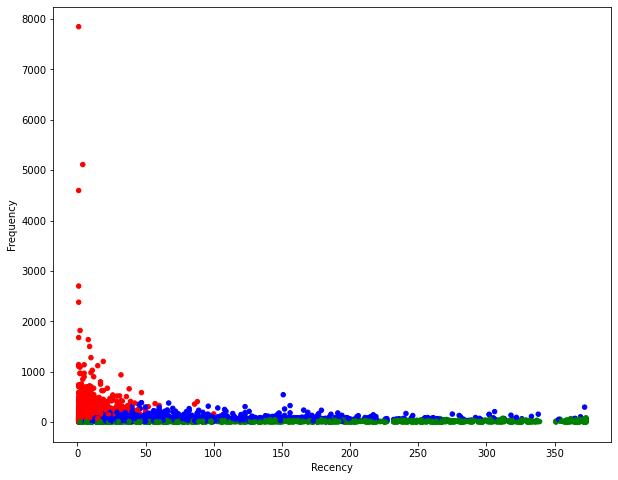

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize = (7,7))

Colors = ["red", "green","blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(
    kind= "scatter",
    x = "Recency", y = "Frequency",
    figsize = (10,8),
    c = RFMScores['Color']
)

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,Silver,2,blue
12747.0,2,103,4196.01,1,4,4,144,9,Silver,0,red
12748.0,1,4596,33719.73,1,4,4,144,9,Silver,0,red
12749.0,3,199,4090.88,1,4,4,144,9,Silver,0,red
12820.0,3,59,942.34,1,3,3,133,7,Gold,0,red


# CUSTOMER LIFETIME VALUE CALCULATION

## Data Preprocessing

In [ ]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
file_path = 'drive/MyDrive/analysisProject/Online_Retail.csv'
data = pd.read_csv(file_path, encoding = 'cp1252')

In [ ]:
data.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.isnull().sum(axis=0)

ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = "%m/%d/%Y %H:%M").dt.date

In [ ]:
data = data[pd.notnull(data['CustomerID'])]

data = data[(data['Quantity']>0)]

data['Total_Sales'] = data['Quantity']*data['UnitPrice']
necessary_cols = ['CustomerID', 'InvoiceDate','Total_Sales']
data = data[necessary_cols]
data.head()

,CustomerID,InvoiceDate,Total_Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [ ]:
print(data['CustomerID'].nunique())

4339


In [ ]:
last_order_date = data['InvoiceDate'].max()
print(last_order_date)
print("----------------------------------")
print(data[(data['CustomerID']==12346)])

2011-12-09
----------------------------------
       CustomerID InvoiceDate  Total_Sales
61619     12346.0  2011-01-18      77183.6


In [ ]:
lf_data = summary_data_from_transaction_data(data, 'CustomerID','InvoiceDate', monetary_value_col='Total_Sales', observation_period_end = '2011-12-09')
lf_data.reset_index().head()

NameError: ignored